# Word representation using TensorFlow-BERT


In [ ]:
%pip install tensorflow
%pip install tensorflow_text
%pip install tensorflow_hub
%pip install tf_models_official

In [2]:
import tensorflow as tf
import numpy as np

data = np.array([
    'this is the first document',
    'this document is the second document',
    'this is the third one not the first nor the third',
    'is this the first document or is is another document'
])

data

array(['this is the first document',
       'this document is the second document',
       'this is the third one not the first nor the third',
       'is this the first document or is is another document'],
      dtype='<U52')

## I. Text preprocessing

### I.1. Using tf-hub model

https://tfhub.dev/google/collections/bert/1

In [3]:
import tensorflow_text as text
import tensorflow_hub as hub
# Load BERT and the preprocessing model from TF Hub.
hub_preprocess = hub.load('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')

# preprocessing the data
text_preprocessed = hub_preprocess(data)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids (sentence 1)   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask (sentence 1) : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids (sentence 1)   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_type_ids', 'input_mask', 'input_word_ids']
Shape      : (4, 128)
Word Ids (sentence 1)   : [ 101 2023 2003 1996 2034 6254  102    0    0    0    0    0]
Input Mask (sentence 1) : [1 1 1 1 1 1 1 0 0 0 0 0]
Type Ids (sentence 1)   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [4]:
# Get special tokens caracters
hub_preprocess.tokenize.get_special_tokens_dict()

{'vocab_size': <tf.Tensor: shape=(), dtype=int32, numpy=30522>,
 'end_of_segment_id': <tf.Tensor: shape=(), dtype=int32, numpy=102>,
 'start_of_sequence_id': <tf.Tensor: shape=(), dtype=int32, numpy=101>,
 'padding_id': <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 'mask_id': <tf.Tensor: shape=(), dtype=int32, numpy=103>}

In [5]:
# get tokenized sentences without special tokens
sent_tok1 = hub_preprocess.tokenize(['The document is fine'])
sent_tok2 = hub_preprocess.tokenize(['It is not small nor big'])

sent_tok1, sent_tok2

(<tf.RaggedTensor [[[1996], [6254], [2003], [2986]]]>,
 <tf.RaggedTensor [[[2009], [2003], [2025], [2235], [4496], [2502]]]>)

In [6]:

text_preprocessed2 = hub_preprocess.bert_pack_inputs([sent_tok1, sent_tok2], tf.constant(16))

print(f'Word Ids   : {text_preprocessed2["input_word_ids"][0, :]}')
print(f'Input Mask : {text_preprocessed2["input_mask"][0, :]}')
print(f'Type Ids   : {text_preprocessed2["input_type_ids"][0, :]}')

Word Ids   : [ 101 1996 6254 2003 2986  102 2009 2003 2025 2235 4496 2502  102    0
    0    0]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
Type Ids   : [0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0]


### I.2. Training a preprocessor

https://www.tensorflow.org/text/guide/subwords_tokenizer

In [7]:
from tensorflow.data import TextLineDataset
ar_dataset = TextLineDataset(['bert_ar_tokenize_train.txt'])

for element in ar_dataset.take(3).as_numpy_iterator():
  print(element.decode('utf-8'))

#ar_dataset = ar_dataset.batch(3).prefetch(2)

list(ar_dataset)[:2]

الجَزائِر هي دولة عربية ذات سيادة تقع في شمال أفريقيا  . 
عاصمتها وأكثر مدنها اكتظاظا بالسكان هي مدينة الجزائر  ، وتقع في أقصى شمال البلاد  . 
بمساحة تبلغ 2 381 741 كيلومتر مربع   ، الجزائر هي عاشر أكبر بلد في العالم  ،  والأولى إفريقياً وعربياً ومتوسطياً والثانية في العالم الإسلامي بعد جمهورية كازاخستان  . 


[<tf.Tensor: shape=(), dtype=string, numpy=b'\xd8\xa7\xd9\x84\xd8\xac\xd9\x8e\xd8\xb2\xd8\xa7\xd8\xa6\xd9\x90\xd8\xb1 \xd9\x87\xd9\x8a \xd8\xaf\xd9\x88\xd9\x84\xd8\xa9 \xd8\xb9\xd8\xb1\xd8\xa8\xd9\x8a\xd8\xa9 \xd8\xb0\xd8\xa7\xd8\xaa \xd8\xb3\xd9\x8a\xd8\xa7\xd8\xaf\xd8\xa9 \xd8\xaa\xd9\x82\xd8\xb9 \xd9\x81\xd9\x8a \xd8\xb4\xd9\x85\xd8\xa7\xd9\x84 \xd8\xa3\xd9\x81\xd8\xb1\xd9\x8a\xd9\x82\xd9\x8a\xd8\xa7  . '>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'\xd8\xb9\xd8\xa7\xd8\xb5\xd9\x85\xd8\xaa\xd9\x87\xd8\xa7 \xd9\x88\xd8\xa3\xd9\x83\xd8\xab\xd8\xb1 \xd9\x85\xd8\xaf\xd9\x86\xd9\x87\xd8\xa7 \xd8\xa7\xd9\x83\xd8\xaa\xd8\xb8\xd8\xa7\xd8\xb8\xd8\xa7 \xd8\xa8\xd8\xa7\xd9\x84\xd8\xb3\xd9\x83\xd8\xa7\xd9\x86 \xd9\x87\xd9\x8a \xd9\x85\xd8\xaf\xd9\x8a\xd9\x86\xd8\xa9 \xd8\xa7\xd9\x84\xd8\xac\xd8\xb2\xd8\xa7\xd8\xa6\xd8\xb1  \xd8\x8c \xd9\x88\xd8\xaa\xd9\x82\xd8\xb9 \xd9\x81\xd9\x8a \xd8\xa3\xd9\x82\xd8\xb5\xd9\x89 \xd8\xb4\xd9\x85\xd8\xa7\xd9\x84 \xd8\xa7\xd9\x84\xd8\xa8\xd9\x84\xd8\xa7\xd8\xa

In [8]:
from tensorflow_text.tools.wordpiece_vocab import bert_vocab_from_dataset as bert_vocab

bert_tokenizer_params=dict(
    lower_case=True
)

reserved_tokens=['[PAD]', '[UNK]', '[CLS]', '[SEP]', '[MASK]']

bert_vocab_args = dict(
    # The target vocabulary size
    vocab_size = 3000,
    # Reserved tokens that must be included in the vocabulary
    reserved_tokens=reserved_tokens,
    # Arguments for `text.BertTokenizer`
    bert_tokenizer_params=bert_tokenizer_params,
    # Arguments for `wordpiece_vocab.wordpiece_tokenizer_learner_lib.learn`
    learn_params={'lower_thresh':5},
)

my_vocab = bert_vocab.bert_vocab_from_dataset(
    ar_dataset, #.batch(10).prefetch(2),
    **bert_vocab_args
)

my_vocab

['[PAD]',
 '[UNK]',
 '[CLS]',
 '[SEP]',
 '[MASK]',
 '"',
 '(',
 ')',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 '«',
 '»',
 '،',
 '؟',
 'ء',
 'ا',
 'ب',
 'ة',
 'ت',
 'ث',
 'ج',
 'ح',
 'خ',
 'د',
 'ذ',
 'ر',
 'ز',
 'س',
 'ش',
 'ص',
 'ض',
 'ط',
 'ظ',
 'ع',
 'غ',
 'ـ',
 'ف',
 'ق',
 'ك',
 'ل',
 'م',
 'ن',
 'ه',
 'و',
 'ى',
 'ي',
 'في',
 'من',
 '##ة',
 '##ها',
 '##ا',
 '##ية',
 '##ي',
 'على',
 '##ت',
 '##ه',
 '##ات',
 '##ر',
 '##م',
 '##ل',
 'التي',
 '##ن',
 'الجزاير',
 '##ين',
 'الى',
 '##د',
 '##هم',
 '##ون',
 '##ان',
 '##ح',
 '##وا',
 '##ع',
 '##ب',
 '##ور',
 'ان',
 '##ير',
 '##ف',
 '##ى',
 '##ام',
 'الذي',
 'كان',
 '##ط',
 'بين',
 'كانت',
 '##ار',
 '##دة',
 'وقد',
 '##ق',
 'الجزايرية',
 '##اء',
 '##رة',
 '##ود',
 '##ول',
 'وادي',
 '##ال',
 '##مة',
 'الوطني',
 'ما',
 '##ما',
 '##يا',
 'المغرب',
 'حيث',
 'هذه',
 '##0',
 '##2',
 '##ري',
 '##س',
 'افريقيا',
 'ذلك',
 'شمال',
 'عن',
 '##اد',
 '##تين',
 '##ج',
 '##رت',
 '##رية',
 '##لة',
 '##وم',
 '##ي

In [9]:
tmp_vocab_file = '/home/kariminf/Data/tutoriel/tmp/ar.vocab'

# writing the vocabulary into a temporary file
with open(tmp_vocab_file, 'w') as f:
    for token in my_vocab:
      print(token, file=f)

In [10]:
from tensorflow_text import BertTokenizer

ar_tokenizer = BertTokenizer(tmp_vocab_file, **bert_tokenizer_params)
ar_tokenizer_txt = BertTokenizer(tmp_vocab_file, **bert_tokenizer_params, token_out_type=tf.string)

ar_tokenizer

In [11]:
ar_tokens1 = ar_tokenizer.tokenize(['الجَزائِر هي دولة عربية ذات سيادة تقع في شمال أفريقيا  .'])

ar_tokens1

<tf.RaggedTensor [[[74], [200], [35, 187], [45, 155, 63], [447], [39, 304], [30, 293], [58], [121], [119], [9]]]>

In [12]:
ar_tokens2 = ar_tokenizer_txt.tokenize(['الجَزائِر هي دولة عربية ذات سيادة تقع في شمال أفريقيا  .'])

for token in list(list(ar_tokens2)[0]):
    s = ''
    for t in token.numpy():
        s += ' ' + t.decode('utf-8')
    print(s)

print('--------------------------')
ar_tokens2m = ar_tokens2.merge_dims(-2, -1)
for token in list(list(ar_tokens2m)[0]):
    print(token.numpy().decode('utf-8'))

 الجزاير
 هي
 د ##ولة
 ع ##رب ##ية
 ذات
 س ##يادة
 ت ##قع
 في
 شمال
 افريقيا
 .
--------------------------
الجزاير
هي
د
##ولة
ع
##رب
##ية
ذات
س
##يادة
ت
##قع
في
شمال
افريقيا
.


In [13]:
ar_detokens1 = ar_tokenizer.detokenize(ar_tokens1)

for token in list(list(ar_detokens1)[0]):
    print(token.numpy()[0].decode('utf-8'))

الجزاير
هي
دولة
عربية
ذات
سيادة
تقع
في
شمال
افريقيا
.


In [14]:
CLS = tf.argmax(tf.constant(reserved_tokens) == "[CLS]")
print('[CLS] =', CLS)
SEP = tf.argmax(tf.constant(reserved_tokens) == "[SEP]")
print('[SEP] =', SEP)
PAD = tf.argmax(tf.constant(reserved_tokens) == "[PAD]")
print('[PAD] =', PAD)
MAX_LEN = 128
MAX_LEN2 = MAX_LEN - 2

def add_start_end(ragged):
    ragged = ragged.merge_dims(-2,-1)
    count = ragged.bounding_shape()[0]
    starts = tf.fill([count, 1], CLS)
    ends = tf.fill([count, 1], SEP)
    ragged = ragged[:, -MAX_LEN2:]
    res = tf.concat([starts, ragged, ends], axis=1)
    return res.to_tensor(shape=[count, MAX_LEN], default_value=PAD)

add_start_end(ar_tokens1)

[CLS] = tf.Tensor(2, shape=(), dtype=int64)
[SEP] = tf.Tensor(3, shape=(), dtype=int64)
[PAD] = tf.Tensor(0, shape=(), dtype=int64)


<tf.Tensor: shape=(1, 128), dtype=int64, numpy=
array([[  2,  74, 200,  35, 187,  45, 155,  63, 447,  39, 304,  30, 293,
         58, 121, 119,   9,   3,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])>

In [15]:
class ArTokenizer(tf.Module):
    def __init__(self):
        self.tokenizer = ar_tokenizer
        self._reserved_tokens = reserved_tokens
        self.vocab = tf.Variable(my_vocab)

        ## Create the signatures for export:   

        # Include a tokenize signature for a batch of strings. 
        self.tokenize.get_concrete_function(tf.TensorSpec(shape=[None], dtype=tf.string))
        self.tokenize_nopad.get_concrete_function(tf.TensorSpec(shape=[None], dtype=tf.string))

        # These `get_*` methods take no arguments
        self.get_vocab_size.get_concrete_function()
        self.get_reserved_tokens.get_concrete_function()

    @tf.function
    def tokenize(self, strings):
        enc = self.tokenizer.tokenize(strings)
        return add_start_end(enc)
    
    @tf.function
    def tokenize_nopad(self, strings):
        return self.tokenizer.tokenize(strings)

    @tf.function
    def get_vocab_size(self):
        return tf.shape(self.vocab)[0]

    @tf.function
    def get_reserved_tokens(self):
        return tf.constant(self._reserved_tokens)

In [16]:
ar_model_path = '/home/kariminf/Data/tutoriel/bert_ar_token'
tf.saved_model.save(ArTokenizer(), ar_model_path)

INFO:tensorflow:Assets written to: /home/kariminf/Data/tutoriel/bert_ar_token/assets


INFO:tensorflow:Assets written to: /home/kariminf/Data/tutoriel/bert_ar_token/assets


In [17]:
import tensorflow_text as text

reloaded_tokenizer = tf.saved_model.load(ar_model_path)

ar_tokens_rel = reloaded_tokenizer.tokenize(['الجَزائِر هي دولة عربية ذات سيادة تقع في شمال أفريقيا  .'])

ar_tokens_rel

<tf.Tensor: shape=(1, 128), dtype=int64, numpy=
array([[  2,  83,  53,  58,  34, 142,  44, 183,  35,  69,  38,  88, 106,
         29, 188,  60, 168, 166,   8,   3,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])>

In [18]:
ar_tokens_rel_nopad = reloaded_tokenizer.tokenize_nopad(['الجَزائِر هي دولة عربية ذات سيادة تقع في شمال أفريقيا  .'])
ar_tokens_rel_nopad

<tf.RaggedTensor [[[83], [53, 58], [34, 142], [44, 183], [35, 69], [38, 88, 106], [29, 188], [60], [168], [166], [8]]]>

## II. Text encoding

### II.1. Using tf-hub model

In [19]:
hub_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/2')

# Use BERT on a batch of raw text inputs.
text_encoded = hub_encoder(text_preprocessed)

text_encoded

{'encoder_outputs': [<tf.Tensor: shape=(4, 128, 128), dtype=float32, numpy=
  array([[[-0.30272555,  0.7067623 , -6.452263  , ..., -0.9379624 ,
           -0.4914864 ,  0.06854436],
          [-2.7249696 ,  1.2982738 ,  0.16811511, ..., -4.148181  ,
           -2.2010918 , -2.388429  ],
          [-2.5665681 ,  0.82445073,  0.22696826, ..., -3.4811137 ,
           -1.1981452 , -1.280134  ],
          ...,
          [-1.0882303 ,  0.7663802 , -0.36233592, ..., -2.0777793 ,
           -0.02864565, -0.09961006],
          [-0.7831269 ,  1.0778471 , -0.39730912, ..., -1.8431315 ,
           -0.15982047, -0.17599884],
          [-0.44202378,  1.2962248 , -0.36632612, ..., -1.5936308 ,
           -0.46940017, -0.29314977]],
  
         [[-0.35713828,  0.73916215, -6.4168353 , ..., -1.0037444 ,
           -0.52118576, -0.04826893],
          [-2.620458  ,  1.4798343 ,  0.38576162, ..., -4.192346  ,
           -2.3510869 , -2.5234041 ],
          [-2.6625538 ,  0.29404777,  0.3326159 , ..., -4

In [20]:
pooled_output = text_encoded["pooled_output"]
# embedding of the first sentence
print(pooled_output[0,:])

tf.Tensor(
[-0.9999978   0.09469287 -0.99929047  0.27537918 -0.999115   -0.5971148
 -0.99546176 -0.95303    -0.0701344  -0.07040184 -0.7565991  -0.03649563
 -0.04945032  1.         -0.5973235  -0.48945084  0.48514897  0.17088273
 -0.6533267   0.6814318   0.9876508  -0.09426827  0.8053285   0.4527445
 -0.9999795  -0.02340178 -0.9997462   0.7623185   0.98504996  0.05111226
  0.05511493  0.07216851 -0.9665822  -0.72186553  0.44624218  0.9998264
 -0.965401   -0.01046555  0.9973469  -0.9993376   0.9916014   0.9237551
 -0.9996473   0.99621475 -0.99998873 -0.17873257 -0.9989677   0.9990991
  0.9779341   0.99672234  0.9947251   0.12321524 -0.05816822  0.96800035
  0.9946639   0.9997741  -0.99689597 -0.6901617   0.9964953  -0.97409534
  0.00603457  0.87430596 -0.887609    0.9208319   0.02739939 -0.9999991
 -0.81231576  0.033195    0.8571852   0.8376998   0.9984142   0.02803145
 -0.9992058   0.03042576  0.8151939  -0.9977297   0.5357129  -0.00716372
 -0.9199667   0.04325847 -0.7394107  -0.124342

### II.2. Train a model from scratch

https://www.tensorflow.org/text/tutorials/fine_tune_bert 

In the past tutorial, the training task is sentences equivalency. 
Here, we will use the original task, which is: next sentence. 
In this case, creating a training dataset is easier. 
We can take a text, and mark consecutive sentences as "<IsNext>". 
The rest of combinations will be marked as "<NotNext>". 
We will use the text used to training the tokenizer. 
Although there are sentences wich mark the start of a paragraph, we will consider them as next to the previous paragraph's last sentence. 

In [21]:
# preparing the dataset
from itertools import permutations

ar_dataset_lst = []

for e in ar_dataset:
    sent = e.numpy().decode('utf-8')
    enc = reloaded_tokenizer.tokenize_nopad([sent])
    ar_dataset_lst.append(enc)
#ar_dataset_lst = list(ar_dataset)

print(len(ar_dataset_lst))

perms = list(permutations(range(len(ar_dataset_lst)), 2))

print('permitations', len(perms))

# We will take only the 4 sentences following a given sentence
for pos in range(len(perms)-1, -1, -1):
    i, j = perms[pos]
    if j > i + 4:
        perms.remove((i, j))

print('permitations after filtering', len(perms))

perms[:10]

135
permitations 18090
permitations after filtering 9575


[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 0),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 0)]

In [22]:
MAX_LEN = 128
MAX_LEN_TWO = 62

def fuse_start_end(sent1, sent2):
    sent1 = sent1.merge_dims(-2,-1)
    sent1 = sent1[:, -MAX_LEN_TWO:]
    sent2 = sent2.merge_dims(-2,-1)
    sent2 = sent2[:, -MAX_LEN_TWO:]
    
    res = tf.concat([[CLS], sent1[0, :], [SEP], sent2[0, :],  [SEP]], axis=0)
    L = len(res)
    if L >= MAX_LEN:
        return res
    return tf.pad(res, [[0, MAX_LEN-L]], constant_values=PAD)
    #return res.to_tensor(shape=[count, MAX_LEN], default_value=PAD)

ar_tokenbin_0 = reloaded_tokenizer.tokenize_nopad([list(ar_dataset)[0]])
ar_tokenbin_1 = reloaded_tokenizer.tokenize_nopad([list(ar_dataset)[1]])

ar_tokens3_fused = fuse_start_end(ar_tokenbin_0, ar_tokenbin_1)

ar_tokens3_fused

<tf.Tensor: shape=(128,), dtype=int64, numpy=
array([  2,  83,  53,  58,  34, 142,  44, 183,  35,  69,  38,  88, 106,
        29, 188,  60, 168, 166,   8,   3,  44,  67, 223,  64,  63,  59,
        54,  67, 102, 116,  70,  51,  72,  66,  59,  26, 102,  63, 224,
        67, 224,  67,  27, 107,  74, 102,  80,  53,  58,  51, 149,  83,
        23,  54,  63, 188,  60,  26,  78, 223,  82, 168, 175,   8,   3,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])>

In [23]:
# to extract the mask 
def get_input_mask(input_word_ids):
    notzero = input_word_ids != PAD
    return tf.cast(notzero, tf.int32)
    
# print(f'Word Ids   : {text_preprocessed2["input_word_ids"][0, :]}')
# print(f'Input Mask : {text_preprocessed2["input_mask"][0, :]}')
# print(f'Type Ids   : {text_preprocessed2["input_type_ids"][0, :]}')
get_input_mask(ar_tokens3_fused)

<tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)>

In [24]:
# to extract position
def get_input_type_ids(input_word_ids):
    res = []
    idx = 0
    for v in input_word_ids.numpy():
        if v != PAD:
            res.append(idx)
            if v == SEP:
                idx += 1
        else:
            res.append(0)
    return tf.constant(res)

get_input_type_ids(ar_tokens3_fused)

<tf.Tensor: shape=(128,), dtype=int32, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)>

In [25]:
# Takes a lot of time
# You'll be an old person before it terminates
train_labels = []
input_word_ids = []
input_mask = []
input_type_ids = []
for i, j in perms:
    label = i + 1 == j
    train_labels.append(label) # j is next to i : True or False
    input_word_ids_two = fuse_start_end(ar_dataset_lst[i], ar_dataset_lst[j])
    #print(len(input_word_ids_two))
    input_word_ids.append(input_word_ids_two.numpy())
    input_mask.append(get_input_mask(input_word_ids_two).numpy())
    input_type_ids.append(get_input_type_ids(input_word_ids_two).numpy())
    
train_labels = tf.cast(train_labels, tf.int32)

train_input = {
    'input_word_ids': tf.constant(input_word_ids),
    'input_mask': tf.constant(input_mask),
    'input_type_ids': tf.constant(input_type_ids)
}

train_labels.shape, train_input['input_word_ids'].shape, train_input['input_mask'].shape, train_input['input_type_ids'].shape

(TensorShape([9575]),
 TensorShape([9575, 128]),
 TensorShape([9575, 128]),
 TensorShape([9575, 128]))

In [26]:
# We can use an externel json file as follows
# import json

# bert_config_file = os.path.join(gs_folder_bert, "bert_config.json")
# config_dict = json.loads(tf.io.gfile.GFile(bert_config_file).read())

# bert_config = bert.configs.BertConfig.from_dict(config_dict)

# instead, we will use a dictionary
# ---------------------------------
from official.nlp.bert import configs


bert_config = configs.BertConfig.from_dict({
    'attention_probs_dropout_prob': 0.1,
    'hidden_act': 'gelu',
    'hidden_dropout_prob': 0.1,
    'hidden_size': 12,
    'initializer_range': 0.02,
    'intermediate_size': 50,
    'max_position_embeddings': 128,
    'num_attention_heads': 4,
    'num_hidden_layers': 4,
    'type_vocab_size': 2,
    'vocab_size': 30522
})

bert_config

In [27]:
# create the classifier and the encoder using the config 
from official.nlp.bert import bert_models

bert_classifier, bert_encoder = bert_models.classifier_model(bert_config, num_labels=2)

bert_classifier, bert_encoder

(<official.nlp.modeling.models.bert_classifier.BertClassifier at 0x7fa7433cfd30>,
 <official.nlp.modeling.networks.bert_encoder.BertEncoder at 0x7fa741608460>)

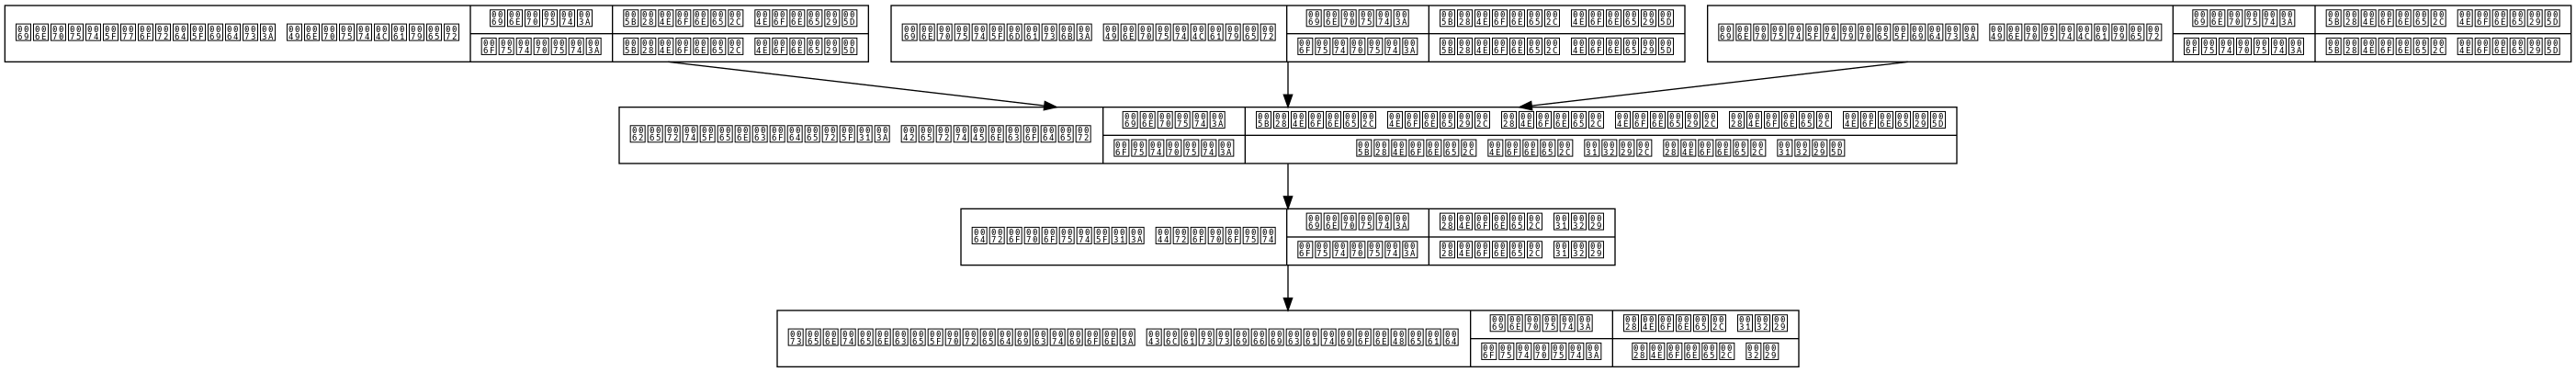

In [28]:
from tensorflow.keras.utils import plot_model

plot_model(bert_classifier, show_shapes=True, dpi=96)

In [29]:
# test the model before training
test_input = {key: val[:5] for key, val in train_input.items()}

bert_classifier(test_input, training=True)

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[ 0.00102322,  0.00984439],
       [ 0.00102213,  0.00493672],
       [-0.00094377,  0.00615552],
       [ 0.00203553,  0.00911242],
       [ 0.00062973,  0.00696448]], dtype=float32)>

In [30]:
ar_bert_export_dir='/home/kariminf/Data/tutoriel/tf_bert_ar'
# checkpoint = tf.train.Checkpoint(encoder=bert_encoder)
# checkpoint.read(ar_bert_export_dir + '/bert_model.ckpt').assert_consumed()

In [31]:
from official.nlp import optimization

# Set up epochs and steps
epochs = 3
batch_size = 32

train_data_size = len(train_labels)

steps_per_epoch = int(train_data_size / batch_size)
num_train_steps = steps_per_epoch * epochs
warmup_steps = int(epochs * train_data_size * 0.1 / batch_size)

# creates an optimizer with learning rate schedule
optimizer = optimization.create_optimizer(
    2e-5, num_train_steps=num_train_steps, num_warmup_steps=warmup_steps)

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

bert_classifier.compile(
    optimizer=optimizer,
    loss=loss
)

bert_classifier.fit(
    train_input, 
    train_labels,
    epochs=epochs
)

Epoch 1/3
300/300 [==============================] - 66s 201ms/step - loss: 0.6899
Epoch 2/3
300/300 [==============================] - 62s 206ms/step - loss: 0.6748
Epoch 3/3
300/300 [==============================] - 61s 202ms/step - loss: 0.6651


In [32]:
# test the model
bert_classifier(test_input, training=False)

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[ 0.0350716 , -0.0291163 ],
       [ 0.0350699 , -0.02911632],
       [ 0.03506955, -0.02911666],
       [ 0.0350701 , -0.02911447],
       [ 0.03507359, -0.02911058]], dtype=float32)>

In [33]:
# save the model
tf.saved_model.save(bert_encoder, export_dir=ar_bert_export_dir)

INFO:tensorflow:Assets written to: /home/kariminf/Data/tutoriel/tf_bert_ar/assets


INFO:tensorflow:Assets written to: /home/kariminf/Data/tutoriel/tf_bert_ar/assets


In [34]:
# recover the model and test it
bert_encoder_reloaded = tf.saved_model.load(ar_bert_export_dir)

bert_encoder_reloaded([test_input['input_word_ids'],
               test_input['input_mask'],
               test_input['input_type_ids']], training=False)

[<tf.Tensor: shape=(5, 1, 12), dtype=float32, numpy=
 array([[[ 0.15802065,  0.5619654 , -0.35064593,  0.8481309 ,
           1.7438745 ,  0.96711576,  0.6266227 ,  0.327303  ,
          -1.3565123 , -1.5097157 , -1.5755755 , -0.44618437]],
 
        [[ 0.15791838,  0.56211275, -0.34948593,  0.8477988 ,
           1.7444849 ,  0.9673338 ,  0.6256008 ,  0.32712603,
          -1.3568416 , -1.5100082 , -1.5748737 , -0.44676068]],
 
        [[ 0.15786055,  0.5622062 , -0.34979507,  0.8476922 ,
           1.7442565 ,  0.96763664,  0.6261352 ,  0.32674572,
          -1.356629  , -1.5105555 , -1.5744376 , -0.44670847]],
 
        [[ 0.15909487,  0.56286454, -0.3501554 ,  0.84793895,
           1.7437003 ,  0.9669559 ,  0.6268989 ,  0.3265    ,
          -1.3581724 , -1.5097756 , -1.5737478 , -0.44769552]],
 
        [[ 0.1647769 ,  0.561637  , -0.35325572,  0.849016  ,
           1.7413151 ,  0.96329755,  0.63223726,  0.32696706,
          -1.361248  , -1.5077103 , -1.5739397 , -0.44872415]]]

## III. Fine-Tuning

https://www.tensorflow.org/text/tutorials/classify_text_with_bert

We will use the loaded bert model in order to train on sentiment analysis. 

In [35]:
sent_sent = [#sentiment sentences
    'this is a good product',
    'this is a bad product',
    'i am happy with this',
    'i really cannot understant why is this product',
    'the product has many benefits',
    'i am not satisfied'
]

sent_labels = [1, 0, 1, 0, 1, 0]

In [41]:
def create_sentiment_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3', name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/2', trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(0.1)(net)
    net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
    return tf.keras.Model(text_input, net)

sent_class_model = create_sentiment_model()
init_res = sent_class_model(tf.constant(sent_sent))
init_res

<tf.Tensor: shape=(6, 1), dtype=float32, numpy=
array([[-0.33055514],
       [-0.36478084],
       [-0.11485544],
       [-0.26358616],
       [-0.4601485 ],
       [ 0.34386456]], dtype=float32)>

In [53]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

epochs = 100

train_data_size = len(sent_sent)

steps_per_epoch = 1
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

sent_class_model.compile(optimizer=optimizer, loss=loss)

sent_class_model.fit(sent_sent, sent_labels, epochs=epochs)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.4841
Epoch 2/100
1/1 [==============================] - 0s 138ms/step - loss: 0.5862
Epoch 3/100
1/1 [==============================] - 0s 155ms/step - loss: 0.5479
Epoch 4/100
1/1 [==============================] - 0s 153ms/step - loss: 0.5080
Epoch 5/100
1/1 [==============================] - 0s 146ms/step - loss: 0.6043
Epoch 6/100
1/1 [==============================] - 0s 136ms/step - loss: 0.5004
Epoch 7/100
1/1 [==============================] - 0s 165ms/step - loss: 0.4106
Epoch 8/100
1/1 [==============================] - 0s 135ms/step - loss: 0.5289
Epoch 9/100
1/1 [==============================] - 0s 132ms/step - loss: 0.6621
Epoch 10/100
1/1 [==============================] - 0s 158ms/step - loss: 0.6184
Epoch 11/100
1/1 [==============================] - 0s 156ms/step - loss: 0.5264
Epoch 12/100
1/1 [==============================] - 0s 130ms/step - loss: 0.4581
Epoch 13/100
1/1 [======================

In [56]:
tf.sigmoid(sent_class_model.predict(sent_sent))

<tf.Tensor: shape=(6, 1), dtype=float32, numpy=
array([[0.7709824 ],
       [0.5375    ],
       [0.8502743 ],
       [0.03831986],
       [0.9032216 ],
       [0.322331  ]], dtype=float32)>

In [57]:
sent_sent_test = [#sentiment sentences
    'this is the best product', #1
    'this is the worst product', #0
    'i am not angry with this at all', #1
    'i really can hate this product', #0
    'the product has not many downs', #1
    'i am unsatisfied' #0
]

tf.sigmoid(sent_class_model.predict(sent_sent_test))

<tf.Tensor: shape=(6, 1), dtype=float32, numpy=
array([[0.772022  ],
       [0.7751663 ],
       [0.6461811 ],
       [0.6866431 ],
       [0.85201824],
       [0.24814597]], dtype=float32)>

For PoS tagging: https://github.com/soutsios/pos-tagger-bert